In [158]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from cosinorage.dataloaders import DataLoader
from cosinorage.features import WearableFeatures

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Raw Accelerometer Data obtained from Smartwatch

In [159]:
reload_smartwatch_p = False

In [160]:
preprocess_args = {
    'autocalib_tol': 10e-15,
    'autocalib_max_iter': 500,
    'autocalib_epoch_size': 10,
    'filter_type': 'lowpass',
    'filter_cutoff': 2
}

In [161]:
if reload_smartwatch_p:
    smartwatch_loader_p = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=True, preprocess_args=preprocess_args)
    smartwatch_loader_p.load_data(verbose=True)
    with open("smartwatch_loader_p.pkl", "wb") as file:
        pickle.dump(smartwatch_loader_p, file)
else:
    with open("smartwatch_loader_p.pkl", "rb") as file:
        smartwatch_loader_p = pickle.load(file)

100%|██████████| 479/479 [00:00<00:00, 275441.68it/s]


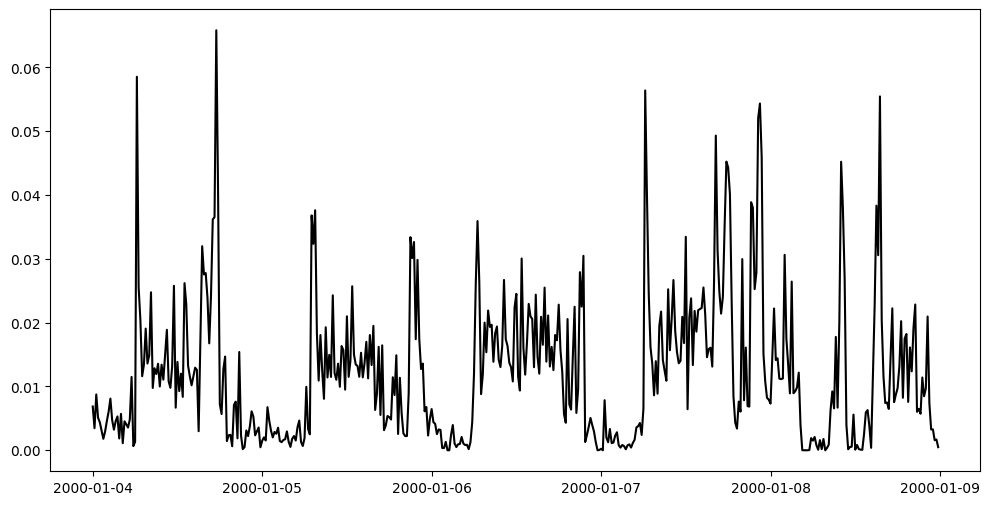

In [162]:
smartwatch_loader_p.plot_orig_enmo()

100%|██████████| 7199/7199 [00:00<00:00, 278531.78it/s]


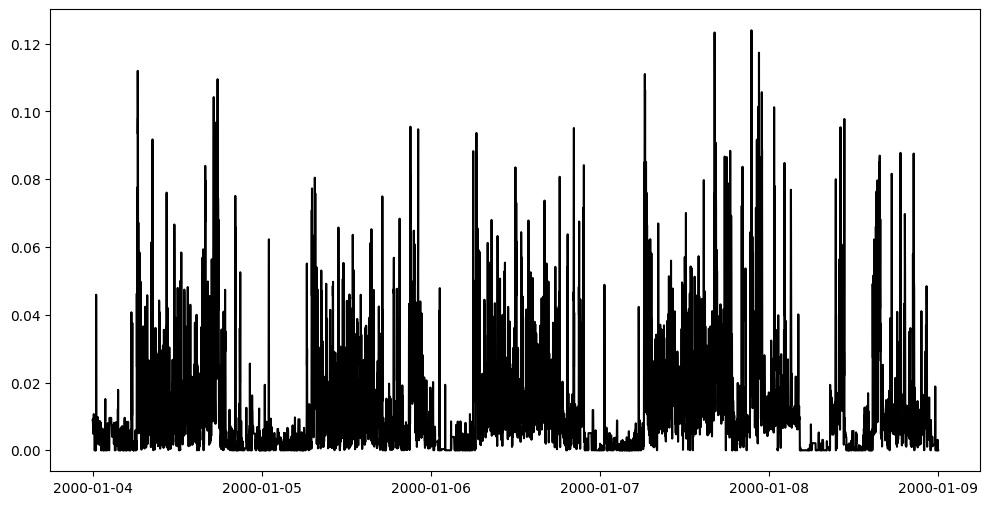

In [163]:
smartwatch_loader_p.plot_enmo()

In [164]:
smartwatch_loader_p.get_meta_data()

{'initial calibration error': 0.019900845583211396,
 'final calibration error': 0.00426933094260819,
 'offset': array([ 0.0280229 , -0.04103817, -0.01399065]),
 'scale': array([0.99644409, 0.99894598, 0.99920414]),
 'total time': 431999.9875,
 'wear time': 426600.0,
 'non-wear time': 5399.987499999988}

In [165]:
data = smartwatch_loader_p.get_acc_data()
data.head()

,X,Y,Z,X_raw,Y_raw,Z_raw,wear,ENMO
TIMESTAMP,,,,,,,,
2000-01-04 00:00:00.000000,-0.705773,0.008862,0.715846,-0.736,0.050,0.730,1.0,0.005300
2000-01-04 00:00:00.012500,-0.705737,0.009688,0.716148,-0.736,0.056,0.730,1.0,0.005498
2000-01-04 00:00:00.025000,-0.705709,0.010496,0.716456,-0.739,0.050,0.730,1.0,0.005706
2000-01-04 00:00:00.037500,-0.705686,0.011277,0.716761,-0.739,0.056,0.736,1.0,0.005916
2000-01-04 00:00:00.050000,-0.705666,0.012020,0.717055,-0.739,0.056,0.739,1.0,0.006120


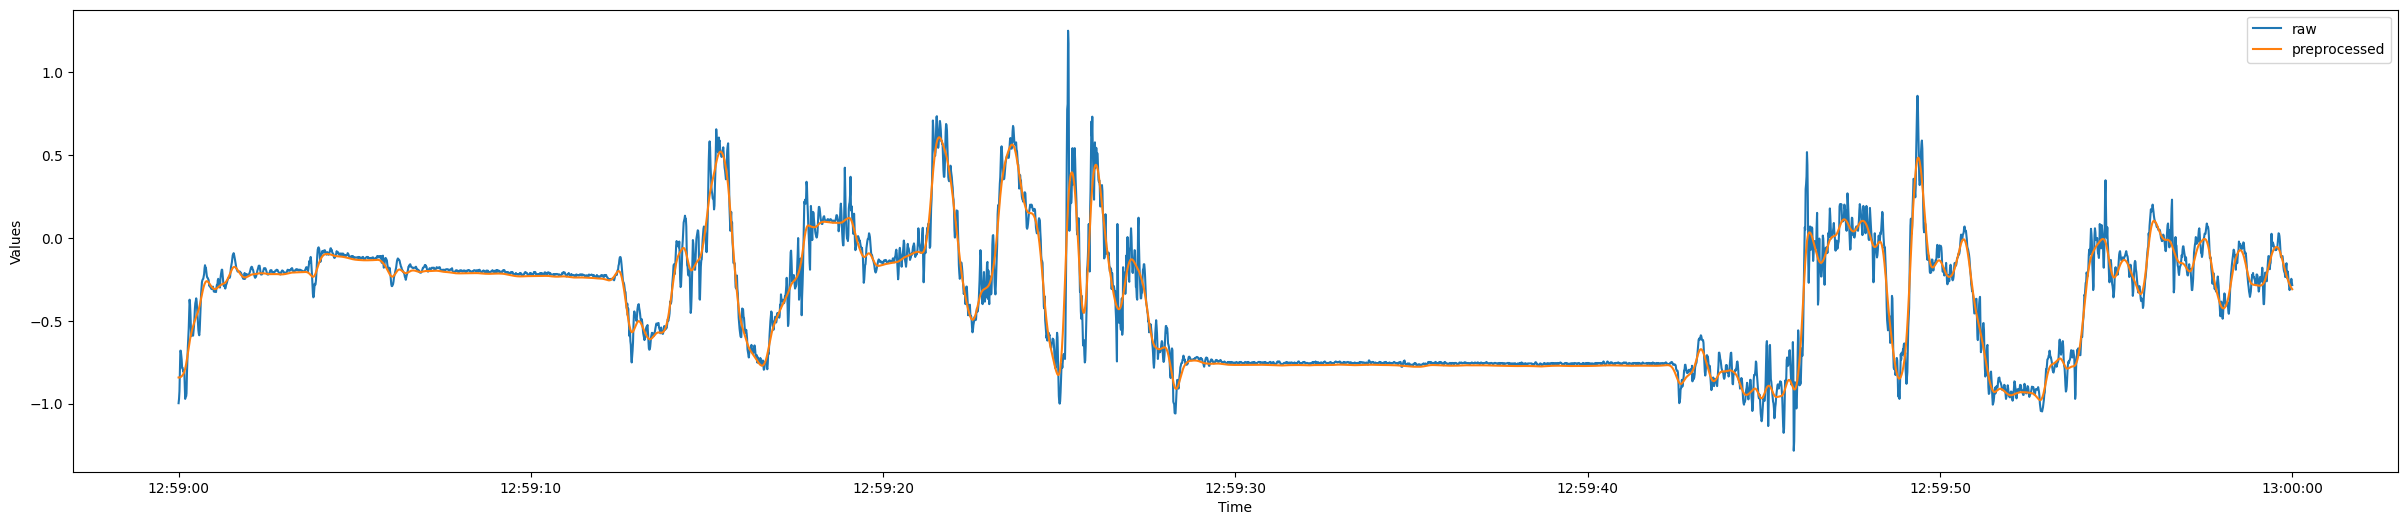

In [166]:
import pandas as pd

# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Select the data for the specified date from 12:00 to 13:00
time_start = pd.Timestamp('2000-01-04 12:59:00')
time_end = pd.Timestamp('2000-01-04 13:00:00')
selected_data = data[(data.index >= time_start) & (data.index <= time_end)]

# Plot raw and preprocessed data
plt.figure(figsize=(30, 6))
plt.plot(selected_data['Z_raw'], label='raw')
plt.plot(selected_data['Z'], label='preprocessed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()



/var/folders/wl/n18csb_91230dq8v__mxqxxr0000gn/T/ipykernel_24815/2004025123.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


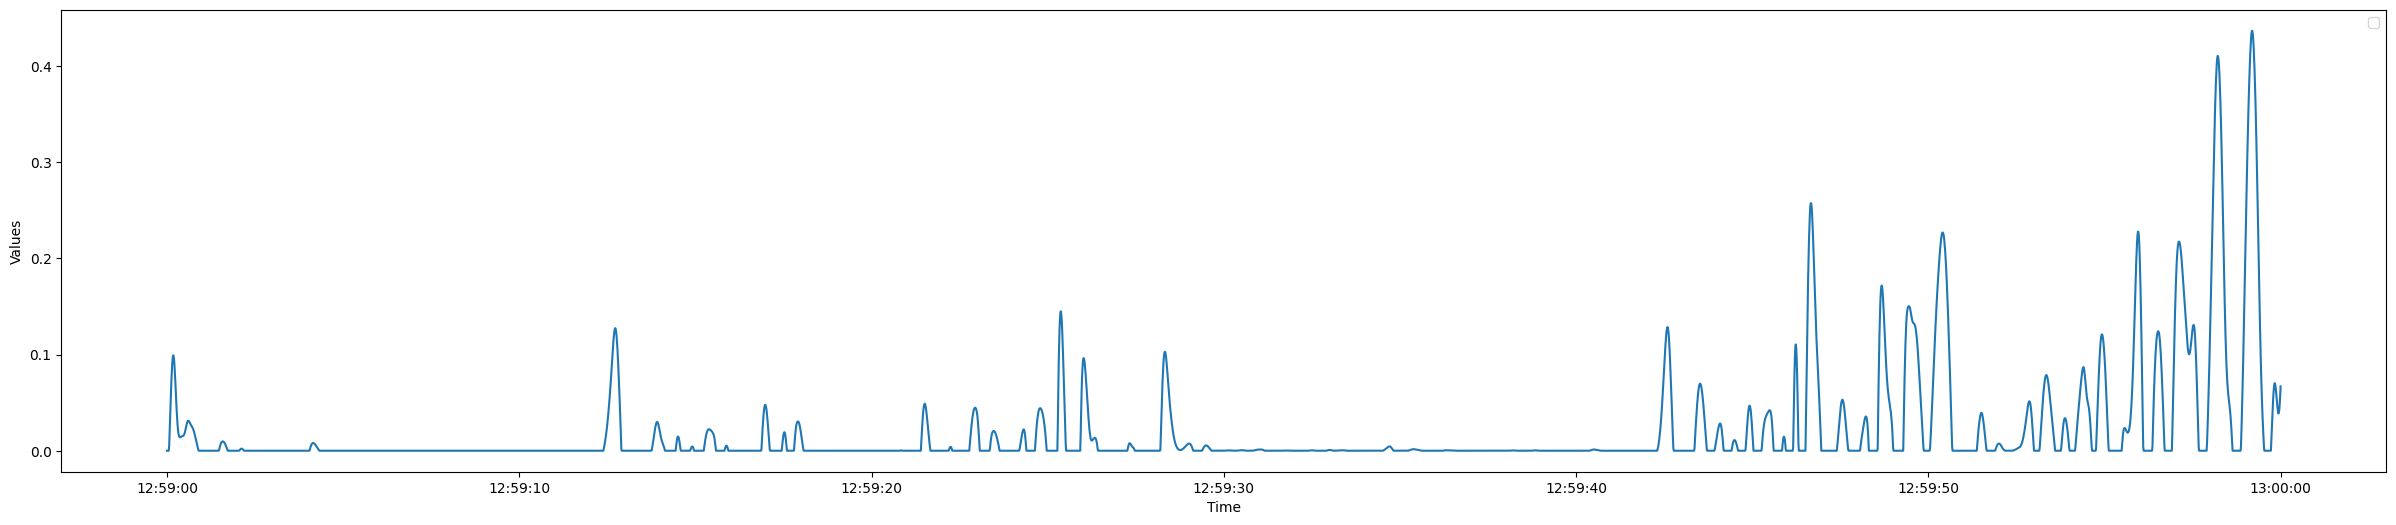

In [167]:
plt.figure(figsize=(30, 6))
plt.plot(selected_data['ENMO'])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

In [168]:
reload_smartwatch = False

In [169]:
if reload_smartwatch:
    smartwatch_loader = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=False)
    smartwatch_loader.load_data(verbose=True)
    with open("smartwatch_loader.pkl", "wb") as file:
        pickle.dump(smartwatch_loader, file)
else:
    with open("smartwatch_loader.pkl", "rb") as file:
        smartwatch_loader = pickle.load(file)

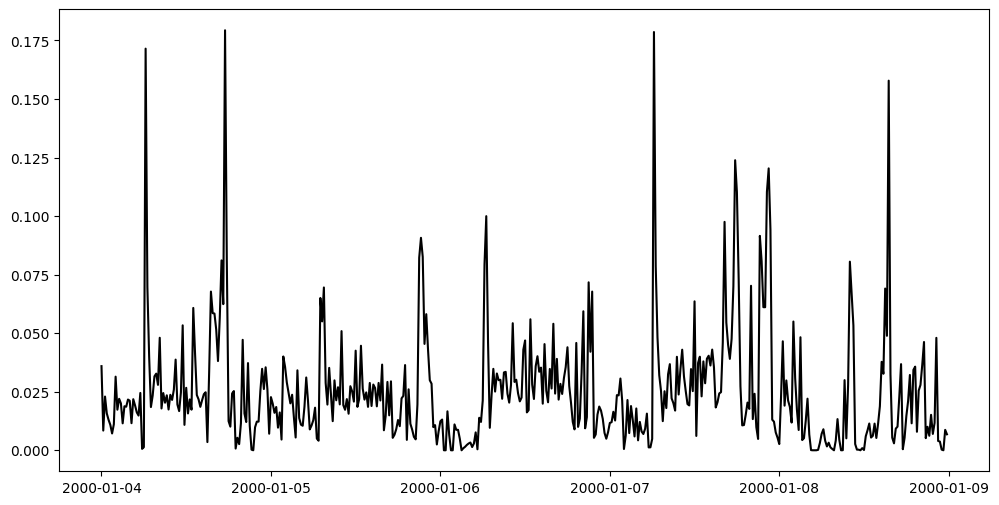

In [170]:
smartwatch_loader.plot_orig_enmo(wear=False)

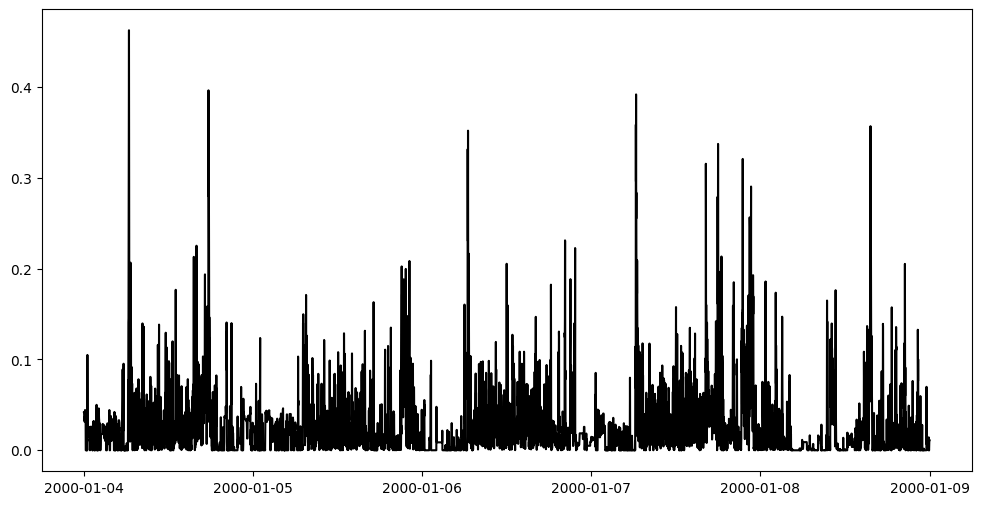

In [171]:
smartwatch_loader.plot_enmo()


In [172]:
smartwatch_loader.get_meta_data()

{}

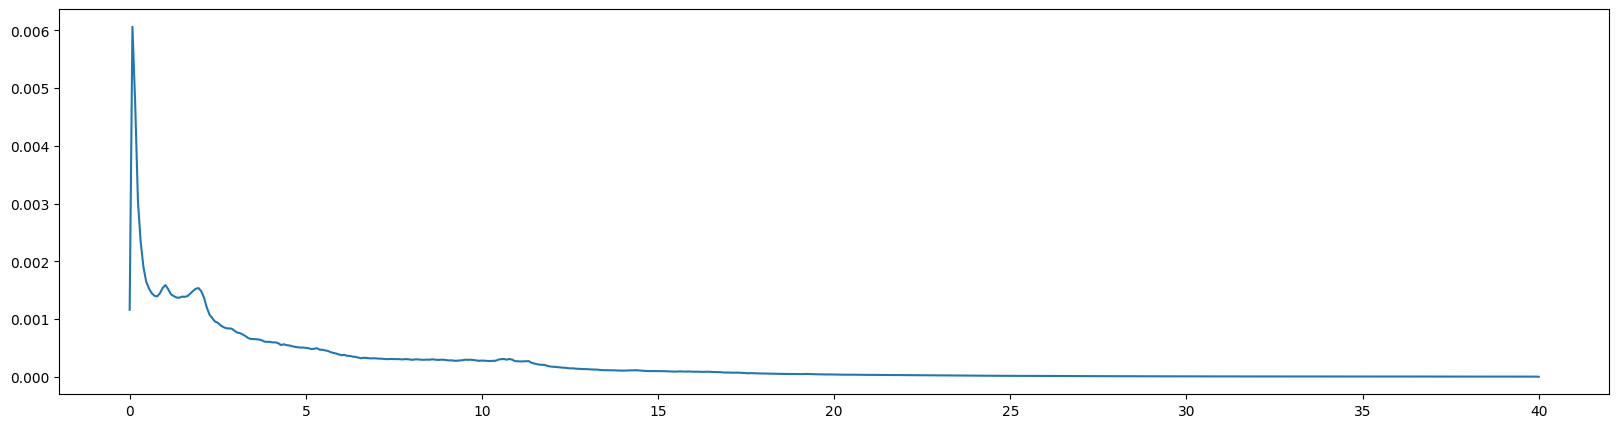

In [173]:
smartwatch_loader.plot_orig_enmo_freq()

## Compute features

In [174]:
preprocessed_features = True
if preprocessed_features:
    features = WearableFeatures(smartwatch_loader_p)
else:
    features = WearableFeatures(smartwatch_loader)

In [175]:
features.get_IV()
features.get_IS()
features.get_RA()
features.get_M10()
features.get_L5()
features.get_M10_start()
features.get_L5_start()
features.get_SB()
features.get_LIPA()
features.get_MVPA()
features.get_WASO()
features.get_TST()
features.get_PTA()
features.get_SRI()
features.get_cosinor_features();


/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/cosinor_analysis.py:61: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fitted_vals_df = pd.concat([fitted_vals_df, model.fittedvalues], ignore_index=True)


In [176]:
features.get_all()

,IV,IS,RA,M10,M10_start,L5,L5_start,SB,LIPA,MVPA,WASO,TST,PTA,SRI,MESOR,amplitude,acrophase,acrophase_time
2000-01-04,0.655179,0.274790,0.782790,0.020305,17,0.002474,21,2.883333,13.283333,7.833333,552.0,888,0.616667,NaN,0.011726,0.007695,5.897759,1351.666846
2000-01-05,0.770409,0.382073,0.781297,0.018173,7,0.002231,4,2.216667,14.066667,7.716667,538.0,902,0.626389,26.111111,0.010605,0.004664,5.914085,1355.408522
2000-01-06,0.747490,0.346415,0.871326,0.018976,6,0.001305,2,3.883333,10.516667,9.600000,709.0,731,0.507639,32.361111,0.012006,0.008341,5.897604,1351.631384
2000-01-07,0.685835,0.250204,0.898978,0.028080,22,0.001494,3,2.500000,9.566667,11.933333,822.0,618,0.429167,53.194444,0.016639,0.009112,5.225605,1197.620558
2000-01-08,0.512672,0.336331,0.904318,0.017933,15,0.000901,12,4.883333,12.650000,6.466667,418.0,1022,0.709722,-6.944444,0.010239,0.004095,4.614994,1057.678760


In [177]:
features.get_enmo_data()

,ENMO,wear,sleep_predictions,date,cosinor_fitted
TIMESTAMP,,,,,
2000-01-04 00:00:00,0.008956,1.0,0.0,2000-01-04,0.004583
2000-01-04 00:01:00,0.009141,1.0,0.0,2000-01-04,0.004570
2000-01-04 00:02:00,0.007170,1.0,0.0,2000-01-04,0.004558
2000-01-04 00:03:00,0.004886,1.0,0.0,2000-01-04,0.004546
2000-01-04 00:04:00,0.004886,1.0,0.0,2000-01-04,0.004534
...,...,...,...,...,...
2000-01-08 23:55:00,0.002130,1.0,0.0,2000-01-08,0.010709
2000-01-08 23:56:00,0.000000,1.0,0.0,2000-01-08,0.010691
2000-01-08 23:57:00,0.000503,1.0,0.0,2000-01-08,0.010673


/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/features.py:142: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(1, 1)


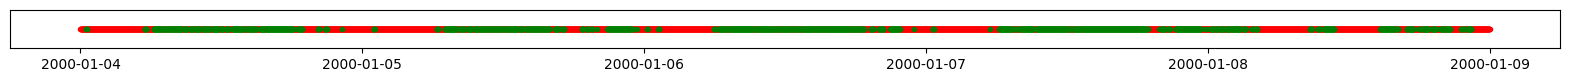

In [178]:
features.plot_sleep_predictions()

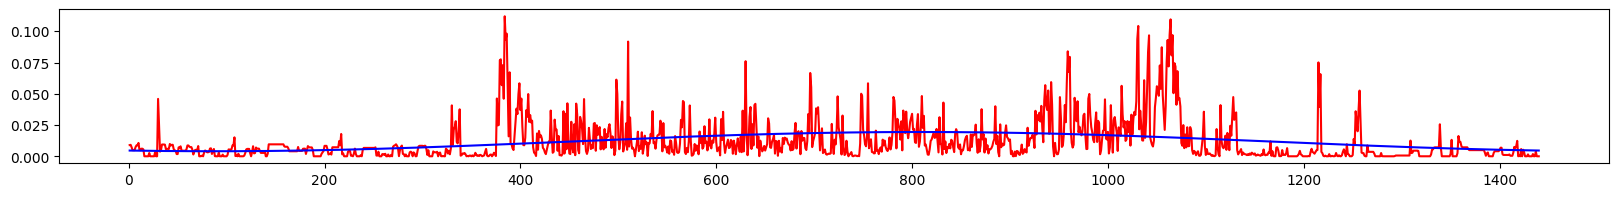

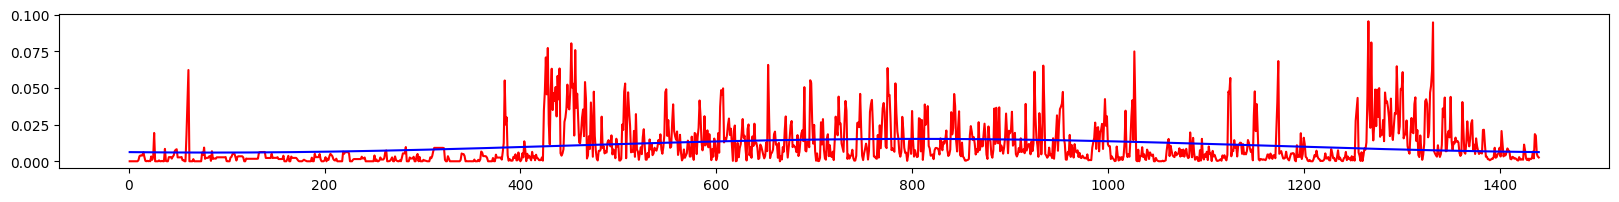

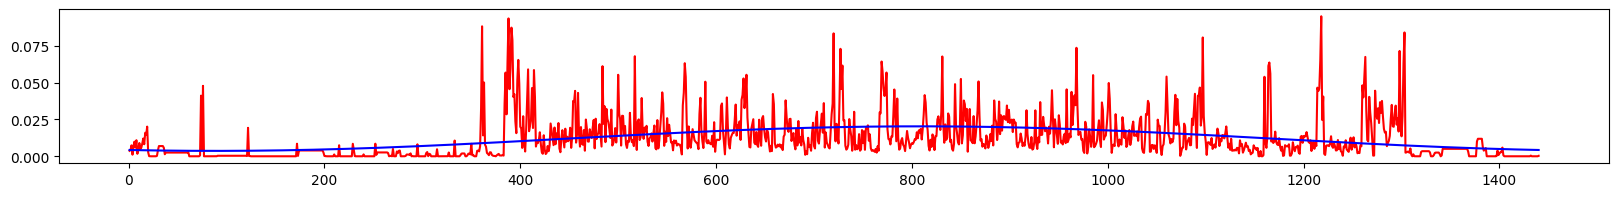

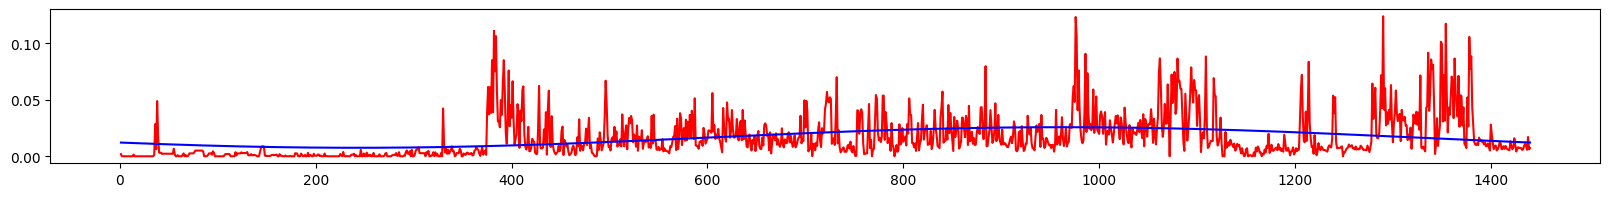

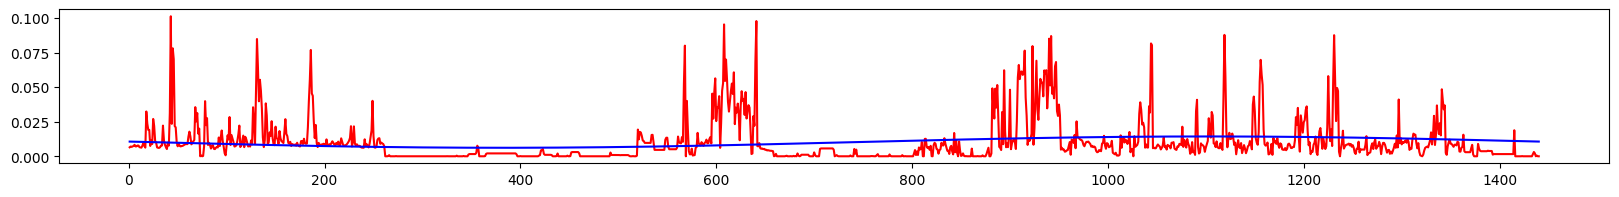

In [181]:
features.plot_cosinor()

In [1]:
# get enmo data
enmo_data = features.get_enmo_data()

# plot enmo and filtered enmo for the first day
time_start = pd.Timestamp('2000-01-08 00:00:00')
time_end = pd.Timestamp('2000-01-08 18:00:00')
selected_data = enmo_data[(enmo_data.index >= time_start) & (enmo_data.index <= time_end)]
plt.figure(figsize=(30, 6))
plt.plot(selected_data['ENMO'], label='ENMO')
# plot sleep predictions as red bands
plt.fill_between(selected_data.index, selected_data['sleep_predictions'], color='green', alpha=0.5)
plt.fill_between(selected_data.index, 1-selected_data['sleep_predictions'], color='red', alpha=0.5)
# y axis limits
plt.ylim(0, max(selected_data['ENMO'])*1.25)
plt.legend()
plt.xlabel("Time")
plt.ylabel("ENMO")
plt.show()

NameError: name 'features' is not defined